In [1]:
import autograd.numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import SGDRegressor
import pandas as pd
import seaborn as sns

from plotting import *
from GradientDescent import Plain, Stochastic
import utils
from neural_network import NeuralNetwork

In [2]:
n = 100
degree = 2
x = np.linspace(0, 1, n)

X = np.empty((n, degree+1))
X[:,0] = 1
X[:,1] = x
X[:,2] = x**2

y =  3 + 7*x + 5*x**2

X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train[:,1:] = scaler.fit_transform(X_train[:,1:])
X_test[:,1:] = scaler.transform(X_test[:,1:])

analytic_beta = [utils.analytic_beta_OLS(X_train, y_train)]

beta = np.ones(degree+1) * 0.1


In [3]:
lr = 0.01
max_iter = 2000

analytic_solution = [utils.cost_OLS(X_test, analytic_beta, y_test)] * max_iter

plain_w_momentum = Plain(lr=lr, max_iter=max_iter, momentum=0.5, save_info_per_iter=True)
plain_wo_momentum = Plain(lr=lr, max_iter=max_iter, momentum=0.0, save_info_per_iter=True)

plain_w_momentum.set_gradient(utils.analytic_grad_OLS)
plain_wo_momentum.set_gradient(utils.analytic_grad_OLS)

plain_w_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)
plain_wo_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)

plain_info_w_momentum = plain_w_momentum.info
plain_info_wo_momentum = plain_wo_momentum.info

plain_iter_range = np.arange(1, max_iter+1)

plain_mse = [0] * max_iter
plain_mse_mom = [0] * max_iter

for i in range(max_iter):
    plain_mse[i] = utils.cost_OLS(X_test, plain_info_wo_momentum[i], y_test)
    plain_mse_mom[i] = utils.cost_OLS(X_test, plain_info_w_momentum[i], y_test)


100%|██████████| 2000/2000 [00:00<00:00, 84235.66it/s]


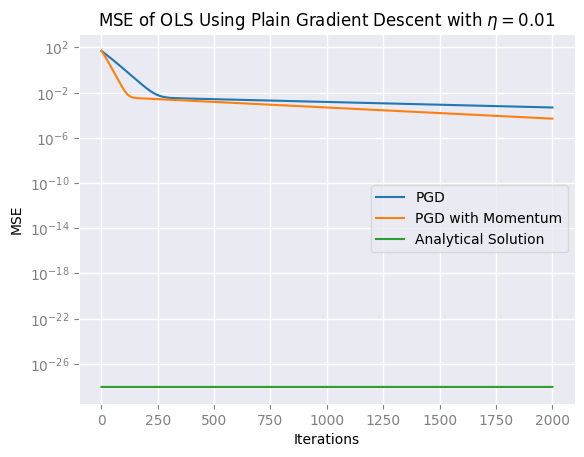

In [4]:
mse_func_of_epochs(
    epochs=plain_iter_range,
    mse=plain_mse,
    mse_mom=plain_mse_mom,
    analytical=analytic_solution,
    fixed_lr=lr,
    sgd=False,
    filename=None,
)

In [5]:
lr = 0.1
n_epochs = 10

analytic_solution = [utils.cost_OLS(X_test, analytic_beta, y_test)] * n_epochs

stochastic_w_momentum = Stochastic(lr=lr, M=4, n_epochs=n_epochs, momentum=0.5, lr_schedule="linear", save_info_per_iter=True)
stochastic_wo_momentum = Stochastic(lr=lr, M=4, n_epochs=n_epochs, momentum=0.0, lr_schedule="linear", save_info_per_iter=True)

stochastic_w_momentum.set_gradient(utils.analytic_grad_OLS)
stochastic_wo_momentum.set_gradient(utils.analytic_grad_OLS)

stochastic_w_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)
stochastic_wo_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)

sgd_info_w_momentum = stochastic_w_momentum.info
sgd_info_wo_momentum = stochastic_wo_momentum.info

sgd_iter_range = np.arange(1, n_epochs+1)

sgd_mse = [0] * n_epochs
sgd_mse_mom = [0] * n_epochs


for i in range(n_epochs):
    sgd_mse[i] = utils.cost_OLS(X_test,sgd_info_wo_momentum[i], y_test)
    sgd_mse_mom[i] = utils.cost_OLS(X_test, sgd_info_w_momentum[i], y_test)

100%|██████████| 10/10 [00:00<00:00, 14246.96it/s]


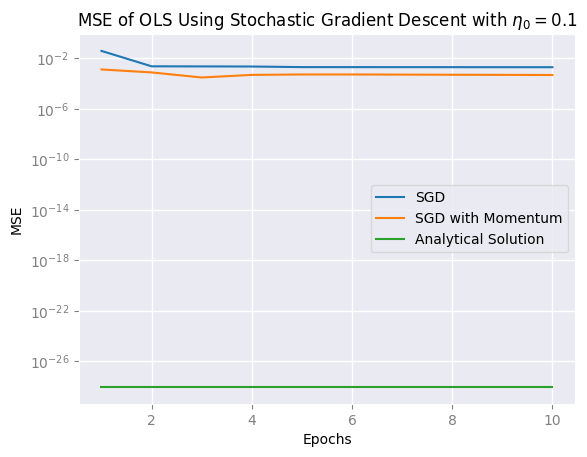

In [6]:
mse_func_of_epochs(
    epochs=sgd_iter_range,
    mse=sgd_mse,
    mse_mom=sgd_mse_mom,
    analytical=analytic_solution,
    fixed_lr=lr,
    sgd=True,
    filename=None,
)

In [7]:
lr = 0.1
n_epochs = 10

stochastic_w_momentum = Stochastic(lr=lr, M=4, n_epochs=n_epochs, momentum=0.5, lr_schedule="linear", save_info_per_iter=True)
stochastic_wo_momentum = Stochastic(lr=lr, M=4, n_epochs=n_epochs, momentum=0.0, lr_schedule="linear", save_info_per_iter=True)
adagrad_w_momentum = Stochastic(lr=lr, M=4, n_epochs=n_epochs, momentum=0.5, tuner="adagrad", save_info_per_iter=True)
adagrad_wo_momentum = Stochastic(lr=lr, M=4, n_epochs=n_epochs, momentum=0.0, tuner="adagrad", save_info_per_iter=True)
rmsprop_w_momentum = Stochastic(lr=lr, M=4, n_epochs=n_epochs, momentum=0.5, tuner="rmsprop", save_info_per_iter=True)
rmsprop_wo_momentum = Stochastic(lr=lr, M=4, n_epochs=n_epochs, momentum=0.0, tuner="rmsprop", save_info_per_iter=True)
adam = Stochastic(lr=lr, M=4, n_epochs=n_epochs, momentum=0.0, tuner="adam", save_info_per_iter=True)

stochastic_w_momentum.set_gradient(utils.analytic_grad_OLS)
stochastic_wo_momentum.set_gradient(utils.analytic_grad_OLS)
adagrad_w_momentum.set_gradient(utils.analytic_grad_OLS)
adagrad_wo_momentum.set_gradient(utils.analytic_grad_OLS)
rmsprop_w_momentum.set_gradient(utils.analytic_grad_OLS)
rmsprop_wo_momentum.set_gradient(utils.analytic_grad_OLS)
adam.set_gradient(utils.analytic_grad_OLS)

stochastic_w_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)
stochastic_wo_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)
adagrad_w_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)
adagrad_wo_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)
rmsprop_w_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)
rmsprop_wo_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)
adam.gradient_descent(X_train, [np.copy(beta)], y_train)

sgd_info_w_momentum = stochastic_w_momentum.info
sgd_info_wo_momentum = stochastic_wo_momentum.info
adagrad_info_w_momentum = adagrad_w_momentum.info
adagrad_info_wo_momentum = adagrad_wo_momentum.info
rmsprop_info_w_momentum = rmsprop_w_momentum.info
rmsprop_info_wo_momentum = rmsprop_wo_momentum.info
adam_info = adam.info

iter_range = np.arange(1, n_epochs+1)

sgd_mse = [0] * n_epochs
sgd_mse_mom = [0] * n_epochs
adagrad_mse = [0] * n_epochs
adagrad_mse_mom = [0] * n_epochs
rmsprop_mse = [0] * n_epochs
rmsprop_mse_mom = [0] * n_epochs
adam_mse = [0] * n_epochs

for i in range(n_epochs):
    sgd_mse[i] = utils.cost_OLS(X_test, sgd_info_wo_momentum[i], y_test)
    sgd_mse_mom[i] = utils.cost_OLS(X_test, sgd_info_w_momentum[i], y_test)
    adagrad_mse[i] = utils.cost_OLS(X_test, adagrad_info_wo_momentum[i], y_test)
    adagrad_mse_mom[i] = utils.cost_OLS(X_test, adagrad_info_w_momentum[i], y_test)
    rmsprop_mse[i] = utils.cost_OLS(X_test, rmsprop_info_wo_momentum[i], y_test)
    rmsprop_mse_mom[i] = utils.cost_OLS(X_test, rmsprop_info_w_momentum[i], y_test)
    adam_mse[i] = utils.cost_OLS(X_test, adam_info[i], y_test)

100%|██████████| 10/10 [00:00<00:00, 6215.63it/s]


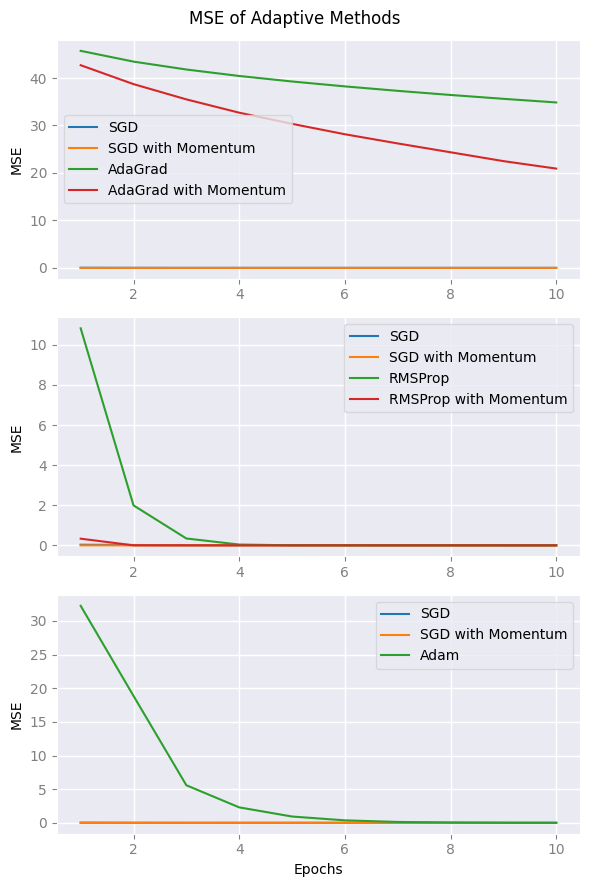

In [8]:
three_stacked_subplots(
    epochs=sgd_iter_range,
    sgd=sgd_mse,
    sgd_mom=sgd_mse_mom,
    adagrad=adagrad_mse,
    adagrad_mom=adagrad_mse_mom,
    rms=rmsprop_mse,
    rms_mom=rmsprop_mse_mom,
    adam=adam_mse,
    lr=lr,
    plot_lr=False,
    save=False,
)

In [9]:
lr = 0.1
n_epochs = 10

n_lmbdas = 4
n_methods = 5

lmbdas = np.logspace(-5, -2, n_lmbdas)
lmbda_labels = [fr"${lmbdas[i]:.5f}$" for i in range(n_lmbdas)]
method_labels = ["SGD", "SGD Mom", "RMSProp", "RMSProp Mom", "Adam"]
grid = np.empty((n_methods,n_lmbdas))

for i, lmbda in enumerate(lmbdas):
    stochastic_w_momentum = Stochastic(lr=lr, M=4, n_epochs=n_epochs, momentum=0.5, lr_schedule="linear", save_info_per_iter=True)
    stochastic_wo_momentum = Stochastic(lr=lr, M=4, n_epochs=n_epochs, momentum=0.0, lr_schedule="linear", save_info_per_iter=True)
    rmsprop_w_momentum = Stochastic(lr=lr, M=4, n_epochs=n_epochs, momentum=0.5, tuner="rmsprop", save_info_per_iter=True)
    rmsprop_wo_momentum = Stochastic(lr=lr, M=4, n_epochs=n_epochs, momentum=0.0, tuner="rmsprop", save_info_per_iter=True)
    adam = Stochastic(lr=lr, M=4, n_epochs=n_epochs, momentum=0.0, tuner="adam", save_info_per_iter=True)

    gradient = utils.analytic_grad_Ridge(lmbda)

    stochastic_w_momentum.set_gradient(gradient)
    stochastic_wo_momentum.set_gradient(gradient)
    rmsprop_w_momentum.set_gradient(gradient)
    rmsprop_wo_momentum.set_gradient(gradient)
    adam.set_gradient(gradient)

    beta_sgd_w_momentum = stochastic_w_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)
    beta_sgd_wo_momentum = stochastic_wo_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)
    beta_rmsprop_w_momentum = rmsprop_w_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)
    beta_rmsprop_wo_momentum = rmsprop_wo_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)
    beta_adam = adam.gradient_descent(X_train, [np.copy(beta)], y_train)

    cost = utils.cost_Ridge(lmbda)

    mse_sgd_w_momentum = cost(X_test, beta_sgd_w_momentum, y_test)[0]
    mse_sgd_wo_momentum = cost(X_test, beta_sgd_wo_momentum, y_test)[0]
    mse_rmsprop_w_momentum = cost(X_test, beta_rmsprop_w_momentum, y_test)[0]
    mse_rmsprop_wo_momentum = cost(X_test, beta_rmsprop_wo_momentum, y_test)[0]
    mse_adam = cost(X_test, beta_adam, y_test)[0]

    mse = [
        mse_sgd_w_momentum,
        mse_sgd_wo_momentum,
        mse_rmsprop_w_momentum,
        mse_rmsprop_wo_momentum,
        mse_adam,
    ]

    grid[:,i] = mse

df = pd.DataFrame(grid, index=method_labels, columns=lmbda_labels)

sns.heatmap(df)
plt.title(fr"MSE of Different Methods for Various $\lambda$")
plt.xlabel(r"$\lambda$")
# plt.savefig("figures/all_plots/gridsearch_ridge.png")
plt.close()

100%|██████████| 10/10 [00:00<00:00, 5836.77it/s]


100%|██████████| 10/10 [00:00<00:00, 366.26it/s]


Text(50.722222222222214, 0.5, 'Number of Nodes per Layer')

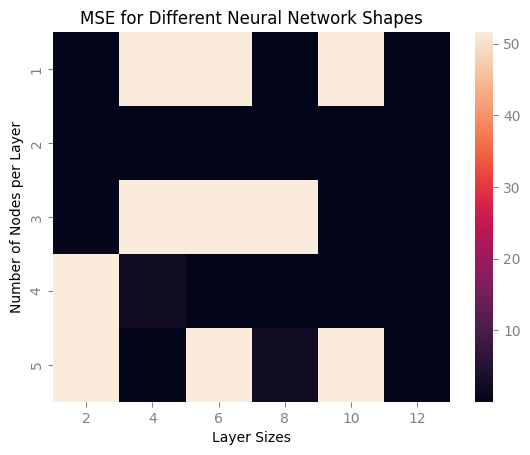

In [10]:
network_input_size = 1

x_train, x_test, y_train, y_test = X_train[:,1].reshape(-1, 1), X_test[:,1].reshape(-1, 1), y_train.reshape(-1, 1), y_test.reshape(-1, 1)

n_layers_list = [1, 2, 3, 4, 5]
layer_sizes = [2, 4, 6, 8, 10, 12]


grid = np.empty((len(n_layers_list), len(layer_sizes)))

for i, n_layers in enumerate(n_layers_list):
    for j, layer_size in enumerate(layer_sizes):
        layer_output_sizes = [layer_size] * n_layers + [1]
        activation_funcs = [utils.ReLU] * (n_layers + 1)
        activation_ders = [utils.ReLU_der] * (n_layers + 1)
        cost_func = utils.mse
        cost_der = utils.mse_der
        optimizer = Stochastic(lr=0.1, M=4, n_epochs=10, tuner="adam")

        nn = NeuralNetwork(
            network_input_size=network_input_size,
            layer_output_sizes=layer_output_sizes,
            activation_funcs=activation_funcs,
            activation_ders=activation_ders,
            cost_func=cost_func,
            cost_der=cost_der,
            optimizer=optimizer,
            seed=16,
        )

        nn.train(x_train, y_train)
        mse = nn.cost(x_test, y_test)
        grid[i, j] = mse

df = pd.DataFrame(grid, index=n_layers_list, columns=layer_sizes)

sns.heatmap(df)
plt.title("MSE for Different Neural Network Shapes")
plt.savefig("figures/all_plots/gridsearch_numpred_layers_nodes.png")
plt.xlabel("Layer Sizes")
plt.ylabel("Number of Nodes per Layer")



In [11]:
df

,2,4,6,8,10,12
1,0.162439,51.621350,51.621350,0.154366,51.621350,0.092742
2,0.345178,0.145560,0.012062,0.177119,0.133383,0.010554
3,0.481179,51.621350,51.621350,51.621350,0.177277,0.301607
4,51.621350,2.406173,0.329552,0.187039,0.085545,0.161879
5,51.621350,0.514273,51.621350,2.291758,51.621350,0.115980


In [12]:
activation_functions = [utils.sigmoid, utils.ReLU, utils.leaky_ReLU]
activation_derivatives = [utils.sigmoid_der, utils.ReLU_der, utils.leaky_ReLU_der]

num_hidden_layers = 4
num_nodes_pr_layer = 4

n_epochs = 10
epoch_range = np.arange(1, n_epochs+1)
mse_list = []

for act_func, act_der in zip(activation_functions, activation_derivatives):
    layer_output_sizes = [num_hidden_layers] * num_nodes_pr_layer + [1]
    activation_funcs = [act_func] * num_hidden_layers + [utils.ReLU]
    activation_ders = [act_der] * num_hidden_layers + [utils.ReLU_der]
    cost_func = utils.mse
    cost_der = utils.mse_der
    optimizer = Stochastic(lr=0.1, M=4, n_epochs=n_epochs, tuner="adam", save_info_per_iter=True)
    nn = NeuralNetwork(
        network_input_size=1,
        layer_output_sizes=layer_output_sizes,
        activation_funcs=activation_funcs,
        activation_ders=activation_ders,
        cost_func=cost_func,
        cost_der=cost_der,
        optimizer=optimizer,
        seed=16,
    )

    nn.train(x_train, y_train)
    params = nn.optimizer.info
    mse_this_act_func = []
    for param in params:
        nn.layers = nn.reconstruct_layers(param)
        cost = nn.cost(x_test, y_test)
        mse_this_act_func.append(cost)

    mse_list.append(mse_this_act_func)

mse_sigmoid, mse_relu, mse_leakyrelu = mse_list



100%|██████████| 10/10 [00:00<00:00, 421.80it/s]


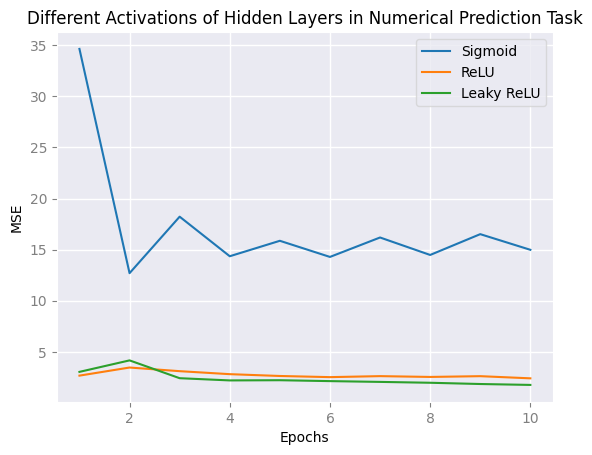

In [13]:
accuracy_with_different_activationfuncs_in_hidden_layers(
    epochs=epoch_range, 
    sigmoid=mse_sigmoid,
    relu=mse_relu,
    leakyrelu=mse_leakyrelu,
    save=False,
    linear=True
)

In [14]:
y_train, y_test = y_train.reshape(-1), y_test.reshape(-1)

sgd_ols = Stochastic(lr=0.1, M=4, n_epochs=n_epochs, tuner="adam", save_info_per_iter=True)
sgd_ols.set_gradient(utils.analytic_grad_OLS)
beta = [np.ones(3) * 0.1]
y_train = y_train.reshape(-1)
final_beta_ols = sgd_ols.gradient_descent(X_train, beta, y_train)
sgd_ols_info = sgd_ols.info

mse_ols = []
for beta_ols in sgd_ols_info:
    mse_ols.append(utils.mse(X_test @ beta_ols[0], y_test))

prediction_ols = X_test @ final_beta_ols[0]


sgd_ridge = Stochastic(lr=0.1, M=4, n_epochs=n_epochs, tuner="adam", save_info_per_iter=True)
cost_ridge = utils.analytic_grad_Ridge(1e-5)
sgd_ridge.set_gradient(cost_ridge)
beta = [np.ones(3) * 0.1]
final_beta_ridge = sgd_ridge.gradient_descent(X_train, beta, y_train)
sgd_ridge_info = sgd_ridge.info

mse_ridge = []
prediction_ridge = []
for beta_ridge in sgd_ridge_info:
    mse_ridge.append(utils.mse(X_test @ beta_ridge[0], y_test))

prediction_ridge = X_test @ final_beta_ridge[0]

sgd_sklearn = SGDRegressor(loss="squared_error", eta0=0.1)
mse_sklearn = []
for epoch in range(10):
    sgd_sklearn.partial_fit(X_train, y_train)
    mse = utils.mse(sgd_sklearn.predict(X_test), y_test)
    mse_sklearn.append(mse)

prediction_sklearn = sgd_sklearn.predict(X_test)


y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)


nn_optimizer = Stochastic(lr=0.1, M=4, n_epochs=n_epochs, tuner="adam", save_info_per_iter=True)
nn = NeuralNetwork(
    network_input_size=1,
    layer_output_sizes=[4, 4, 4, 4, 1],
    activation_funcs=[utils.ReLU] * 5,
    activation_ders=[utils.ReLU_der] * 5,
    cost_func=utils.mse,
    cost_der=utils.mse_der,
    optimizer=nn_optimizer,
    seed=16,
)

nn.train(x_train, y_train)
params = nn.optimizer.info
mse_nn = []
prediction_nn = []
for param in params:
    nn.layers = nn.reconstruct_layers(param)
    cost = nn.cost(x_test, y_test)
    mse_nn.append(cost)

prediction_nn = nn.predict(x_test)


100%|██████████| 10/10 [00:00<00:00, 498.33it/s]


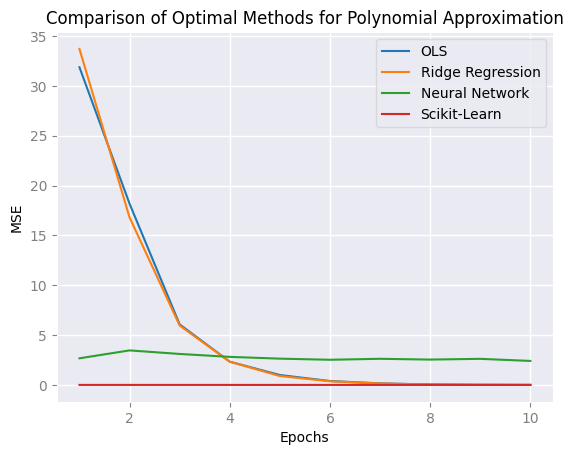

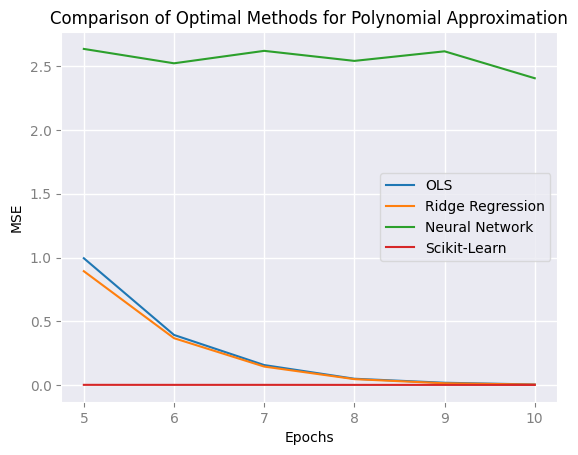

In [ ]:
epochs = np.arange(1, 10+1)

mse_linreg_comparison(
    epochs=epochs,
    ols=mse_ols,
    ridge=mse_ridge,
    nn=mse_nn,
    sklearn=mse_sklearn,
    save=False,
)

mse_linreg_comparison(
    epochs=epochs[4:],
    ols=mse_ols[4:],
    ridge=mse_ridge[4:],
    nn=mse_nn[4:],
    sklearn=mse_sklearn[4:],
    save=False,
)

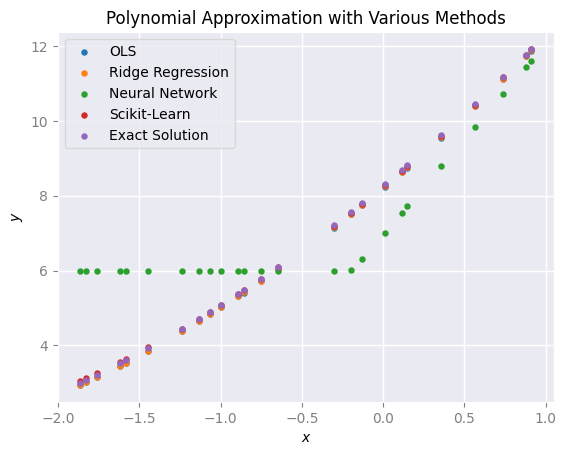

In [ ]:
prediction_comparison(
    input=x_test,
    target=y_test,
    ols_pred=prediction_ols,
    ridge_pred=prediction_ridge,
    nn_pred=prediction_nn,
    sklearn_pred=prediction_sklearn,
    save=False,
)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
class NN(nn.Module):
    def __init__(self, input_size, node_size, num_hidden_layers, activation):
        super(NN, self).__init__()

        self.output = nn.Linear(node_size, 1) #output
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, node_size))  #Input
        self.activation_func = None 

        if activation == 'relu':
            self.activation_func = nn.ReLU()
        elif activation == 'leaky_relu':
            self.activation_func = nn.LeakyReLU()
        elif activation == 'sigmoid':
            self.activation_func = nn.Sigmoid()
        else:
            raise ValueError

        for _ in range(num_hidden_layers):
            self.layers.append(nn.Linear(node_size, node_size))

    def forward(self, x):
        for layer in self.layers:
            x = self.activation_func(layer(x))

        return torch.sigmoid(self.output(x))

In [ ]:
class LogReg(nn.Module):
    def __init__(self, input_size):
        super(LogReg, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x)) 

In [ ]:
X, y = utils.get_cancer_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
cost_func = nn.BCELoss()
lr = 0.1
accuracy_dict = {
    'n_hidden_layers': [],
    'n_nodes_pr_layer': [],
    'accuracy': []
}

for n_nodes in range(1, 101, 10):
    for n_hidden_layers in [1, 2, 3, 4, 5]:
        for activation_func in ["leaky_relu"]:
            model = NN(30, n_nodes, n_hidden_layers, activation_func)

            n_epochs = 50
            for _ in range(n_epochs):
                outputs = model(X_train_tensor)
                cost = cost_func(outputs, y_train_tensor)
                optimizer = optim.SGD(model.parameters(), lr=lr)
                optimizer.zero_grad()
                cost.backward()
                optimizer.step()

            with torch.no_grad():
                    test_outputs = model(X_test_tensor)
                    accuracy = utils.accuracy(test_outputs, y_test_tensor)
                #   predicted = (test_outputs > 0.5).float()
                #   accuracy = (predicted.eq(y_test_tensor).sum().item() / y_test_tensor.size(0)) * 100

            accuracy_dict['num_hidden_layers'].append(n_hidden_layers)
            accuracy_dict['node_size'].append(n_nodes)
            accuracy_dict['accuracy'].append(accuracy)

df_accuracy = pd.DataFrame(accuracy_dict)
heatmap_data = df_accuracy.pivot(index='num_hidden_layers', columns='node_size', values='accuracy')